In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('loan_approval_dataset.csv')
data.columns = data.columns.str.strip()

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
data['loan_status'].value_counts()


,count
loan_status,
Approved,2656
Rejected,1613


In [4]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [5]:
data['no_of_dependents']=data['no_of_dependents'].replace('3+',3).astype(float)

In [6]:
# print(data[' education'].unique())


In [7]:
# data[' education']=data[' education'].map({' Graduate':1, ' Not Graduate':0})
# data.head()

Our dataset has columns which have trailing spaces, due to which encoding is not done properly. we have to remove these spaces

In [8]:
data=data.apply(lambda x: x.str.strip() if x.dtype=='object' else x)
data.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0.0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3.0,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3.0,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5.0,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0.0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5.0,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2.0,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0.0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5.0,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


Feature Engineering

In [9]:
data['total_assets']=data['residential_assets_value']+data['commercial_assets_value']+data['luxury_assets_value']+data['bank_asset_value']
data.head()
data['income_loan_ratio']=data['income_annum']/data['loan_amount']
data.head()
data['loan_term_years'] = data['loan_term'] / 12
data.head(10)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,income_loan_ratio,loan_term_years
0,1,2.0,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000,0.321070,1.000000
1,2,0.0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000,0.336066,0.666667
2,3,3.0,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000,0.306397,1.666667
3,4,3.0,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000,0.267101,0.666667
4,5,5.0,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000,0.404959,1.666667
5,6,0.0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,33900000,0.355556,0.833333
6,7,5.0,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,70800000,0.263636,0.333333
7,8,2.0,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,36700000,0.380000,1.666667
8,9,0.0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,5500000,0.363636,1.666667
9,10,5.0,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,9500000,0.255814,0.833333


In [10]:
data['education']=data['education'].map({'Graduate':1, 'Not Graduate':0})
data.head()



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,income_loan_ratio,loan_term_years
0,1,2.0,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000,0.321070,1.000000
1,2,0.0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000,0.336066,0.666667
2,3,3.0,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000,0.306397,1.666667
3,4,3.0,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000,0.267101,0.666667
4,5,5.0,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000,0.404959,1.666667


In [11]:
data['self_employed']=data['self_employed'].map({'Yes':1, 'No':0})
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,income_loan_ratio,loan_term_years
0,1,2.0,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000,0.321070,1.000000
1,2,0.0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000,0.336066,0.666667
2,3,3.0,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000,0.306397,1.666667
3,4,3.0,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000,0.267101,0.666667
4,5,5.0,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000,0.404959,1.666667


In [12]:
print(data['loan_status'].unique())

['Approved' 'Rejected']


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['loan_status']=le.fit_transform(data['loan_status'])
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,income_loan_ratio,loan_term_years
0,1,2.0,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,50700000,0.321070,1.000000
1,2,0.0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,17000000,0.336066,0.666667
2,3,3.0,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,57700000,0.306397,1.666667
3,4,3.0,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,52700000,0.267101,0.666667
4,5,5.0,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,55000000,0.404959,1.666667


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X = data.drop(['loan_status','loan_id'], axis=1)
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = ['income_annum', 'loan_amount', 'cibil_score',
                  'residential_assets_value', 'commercial_assets_value',
                  'luxury_assets_value', 'bank_asset_value','total_assets','income_loan_ratio','loan_term_years']

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
joblib.dump(scaler, 'scaler.pkl')

from google.colab import files
files.download('scaler.pkl')

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print(scaler)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

StandardScaler()


implementing logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
model.fit(X_train,y_train)
print(X.columns)


Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'total_assets', 'income_loan_ratio', 'loan_term_years'],
      dtype='object')


In [16]:
y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8992974238875878
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       536
           1       0.87      0.85      0.86       318

    accuracy                           0.90       854
   macro avg       0.89      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854



Now implementing SVM

In [18]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear',random_state=42)
svm_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [19]:
y_pred_svm = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9121779859484778
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       536
           1       0.87      0.90      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



Implementing random forest but first hypertuning the parameters


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {
    'n_estimators': [100, 200],           # Number of trees
    'max_depth': [None, 10, 20],          # Max depth of trees
    'min_samples_split': [2, 5],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2],           # Minimum samples at a leaf node
    'bootstrap': [True, False]            # Whether to use bootstrapping
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy', #Meaning: Use all available CPU cores to run the model training in parallel.
                           verbose=1 #Meaning: Shows progress output during execution. Why: Useful for tracking how far along the search has gone.


)


In [22]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [23]:
best_rf = grid_search.best_estimator_
joblib.dump(best_rf, 'loan_model.pkl')

joblib.dump(X.columns.tolist(), 'model_columns.pkl')


y_pred = best_rf.predict(X_test)


Classification report and accuracy

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9988290398126464
Confusion Matrix:
 [[536   0]
 [  1 317]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       318

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



Feature importance

no_of_dependents            0.004356
education                   0.001284
self_employed               0.001398
income_annum                0.008105
loan_amount                 0.013410
loan_term                   0.034029
cibil_score                 0.819669
residential_assets_value    0.009161
commercial_assets_value     0.008150
luxury_assets_value         0.008445
bank_asset_value            0.007202
total_assets                0.009776
income_loan_ratio           0.044158
loan_term_years             0.030855
dtype: float64


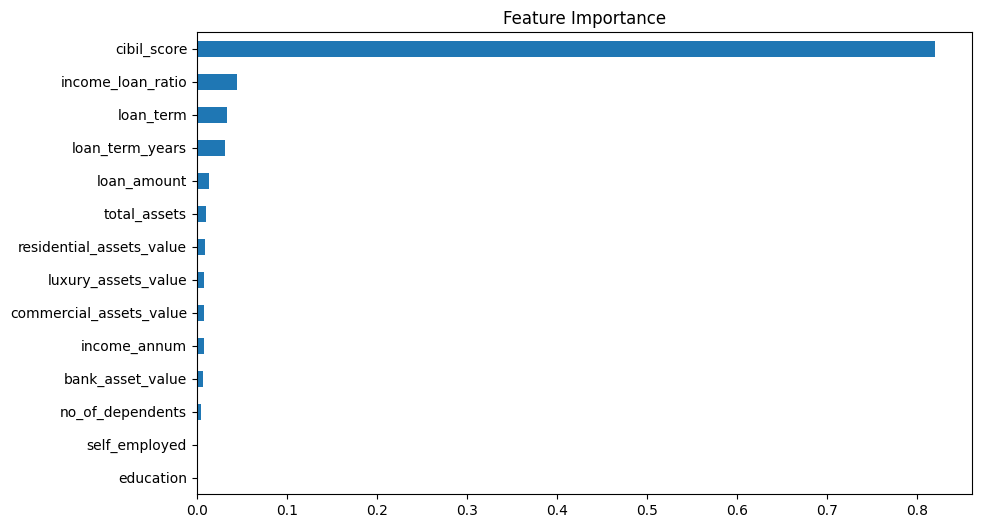

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


In [26]:
print(X.columns.tolist())
print(len(X.columns))


['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'total_assets', 'income_loan_ratio', 'loan_term_years']
14


Testing on approved samples

It is giving 0 because in my dataset i have encoded Approved loan as 0

In [32]:

approved_sample = data[data['loan_status'] == 0].sample(1, random_state=1)

X_approved = approved_sample.drop(['loan_status', 'loan_id'], axis=1).copy()


In [33]:
numerical_cols = ['income_annum', 'loan_amount', 'cibil_score',
                  'residential_assets_value', 'commercial_assets_value',
                  'luxury_assets_value', 'bank_asset_value',
                  'total_assets', 'income_loan_ratio', 'loan_term_years']

import joblib
scaler = joblib.load('scaler.pkl')

X_approved[numerical_cols] = scaler.transform(X_approved[numerical_cols])


In [34]:

model = joblib.load('loan_model.pkl')

model_columns = model.feature_names_in_
X_approved = X_approved[model_columns]

# Predict
prediction = model.predict(X_approved)[0]
print("Prediction:", prediction)


Prediction: 0
